<a href="https://colab.research.google.com/github/sarahlai30/Machine-Learning-INDE-577/blob/main/Supervised%20Learning/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **The Single Neuron Linear Regression Model**

Linear regression attempts to model the relationship between two variables by fitting a linear equation to the observed data. In this example, we will be using car horsepower to predict miles per gallon.

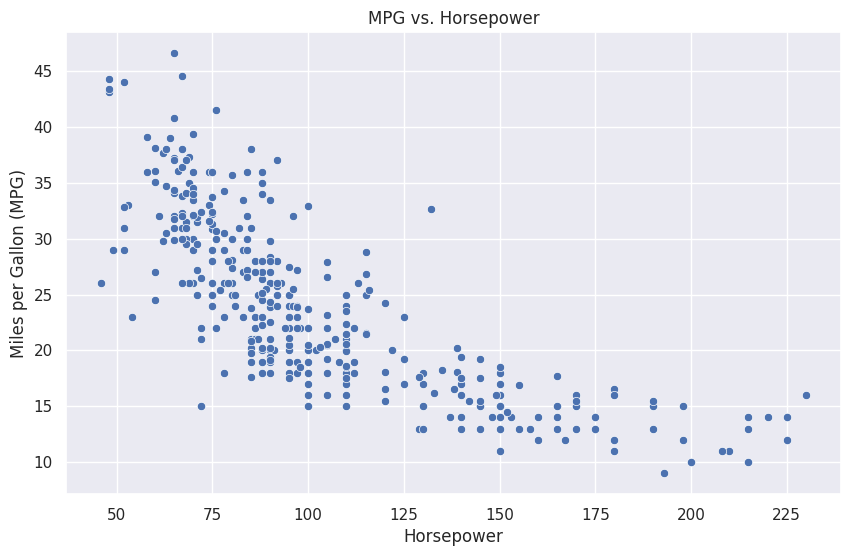

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set_theme()

# Load the dataset
mpg_data = sns.load_dataset("mpg").dropna()

# Select one feature and the target variable
mpg_data = mpg_data[['horsepower', 'mpg']]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=mpg_data, x='horsepower', y='mpg')
plt.title("MPG vs. Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon (MPG)")
plt.show()


By visualizing the relationship, we can see there is a linear relationship in horsepower and mpg.

In addition to inputs and outputs, a single neuron model requires a cost function and an activation function. The cost function is a necessary component in machine learning as it measures how well the model predictions align with the true values. It measures error and serves as the basis for optimizing the model's parameters (e.g., weights and biases) during training. To minimize the cost function, stochastic gradient descent is used, iteratively updating the weights and bias to improve predictions.

We implement a SingleNeuron class to train the neuron and make predictions based
on the learned parameters. This class models a simple artificial neuron with a
customizable activation function.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_normal = y / np.max(np.abs(y))  # Normalize `y` to [-1, 1]

Since the x values span a wide range, we scale them to normalize the data and achieve unit variance, which improves the performance of most machine learning algorithms. Similarly, y is normalized to ensure that the target values are on a comparable scale to the features. This prevents any single feature or target value from disproportionately influencing the training process.

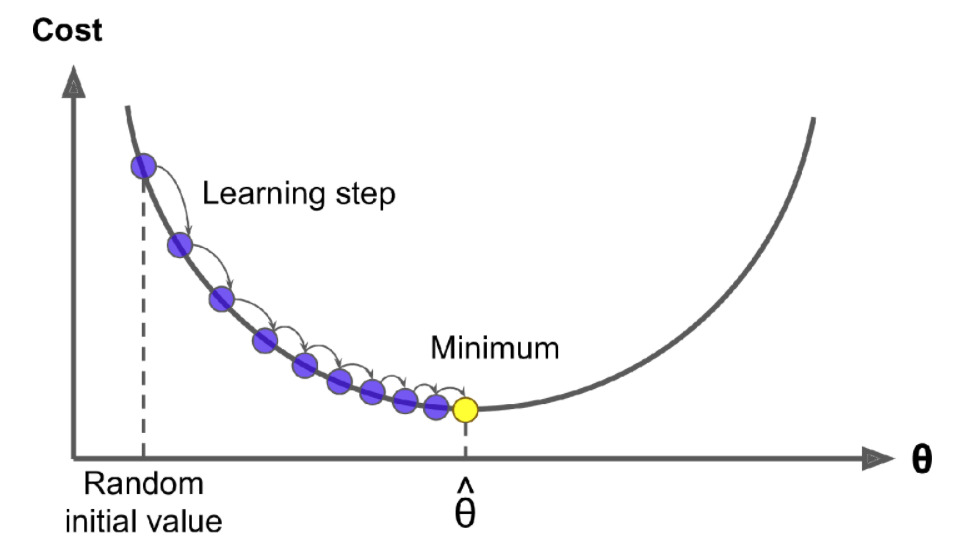

In [ ]:
import numpy as np

class SingleNeuron:
    def __init__(self, activation_function, alpha=0.001, epochs=10):
        """
        Single Neuron model with a customizable activation function.

        Parameters:
            activation_function: function (e.g., np.tanh, sigmoid).
            alpha: float, learning rate (default 0.005).
            epochs: int, number of training epochs (default 50).
        """
        self.activation_function = activation_function
        self.alpha = alpha
        self.epochs = epochs

    def train(self, X, y):
        """
        Train the neuron using gradient descent.

        Parameters:
            X: ndarray, shape (n_samples, n_features) - Training data.
            y: ndarray, shape (n_samples,) - Target values.

        Returns:
            self
        """
        # Initialize weights
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                # Update weights for each feature and bias
                self.w_[:-1] -= self.alpha * error * xi
                self.w_[-1] -= self.alpha * error
                errors += 0.5 * (error ** 2)
            # Track the mean squared error for each epoch
            self.errors_.append(errors / N)
        return self

    def predict(self, X):
        """
        Make predictions with the neuron.

        Parameters:
            X: ndarray, shape (n_samples, n_features) - Input data.

        Returns:
            Output after applying the activation function.
        """
        # Compute the linear combination
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        # Apply the activation function
        return self.activation_function(preactivation)


To instantiate an instance of the SingleNeuron model, we first need to define an activation function. Once the activation function is defined, we can create a SingleNeuron object. After instantiating the model, we train it by calling the train() method, providing the input data (X) and target values (y).

In [ ]:
def linear_activation(z):
    return z
node = SingleNeuron(linear_activation)
node.train(X_scaled, y_normal)

We can visualize the linear regression line by creating a scatter plot of the data and overlaying the predicted outputs across a domain within the range of the input feature values.

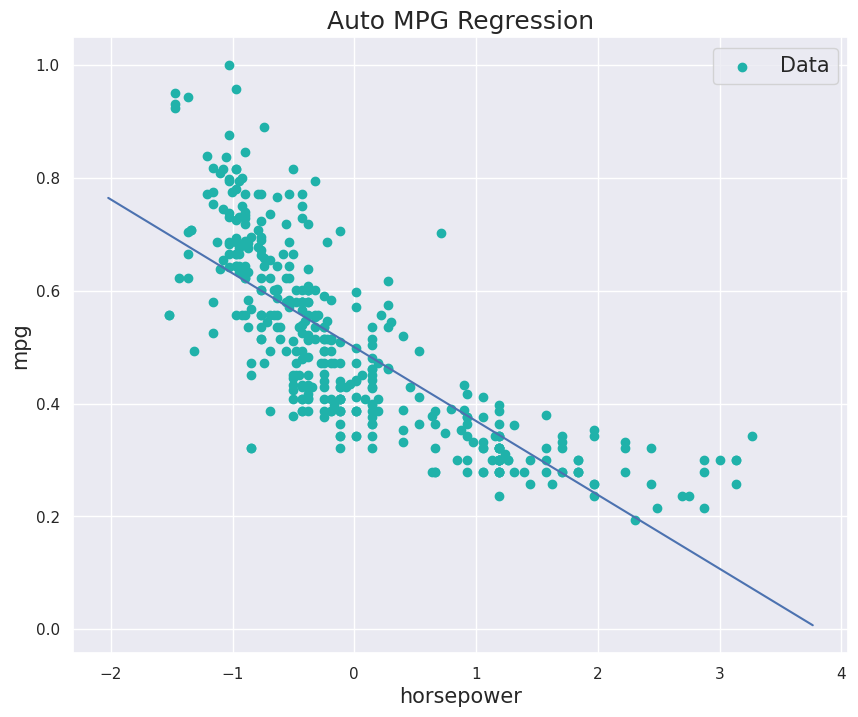

In [ ]:
domain = np.linspace(np.min(X_scaled) - 0.5, np.max(X_scaled) + 0.5, 100)

plt.figure(figsize=(10, 8))
plt.scatter(X_scaled, y_normal, color="lightseagreen", label="Data")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("horsepower", fontsize=15)
plt.ylabel("mpg", fontsize=15)
plt.title("Auto MPG Regression", fontsize=18)
plt.legend(fontsize=15)
plt.show()

The line generated by our custom SingleNeuron class is clearly not random! We can further verify this by plotting the errors_ attribute, which was recorded during training. Note that the 𝑛-th entry in the errors_ attribute represents the mean squared error (MSE) of the neuron after the 𝑛-th epoch of stochastic gradient descent. If the MSE decreases consistently after each epoch, it indicates that the model is on the right track and our single neuron is successfully learning!

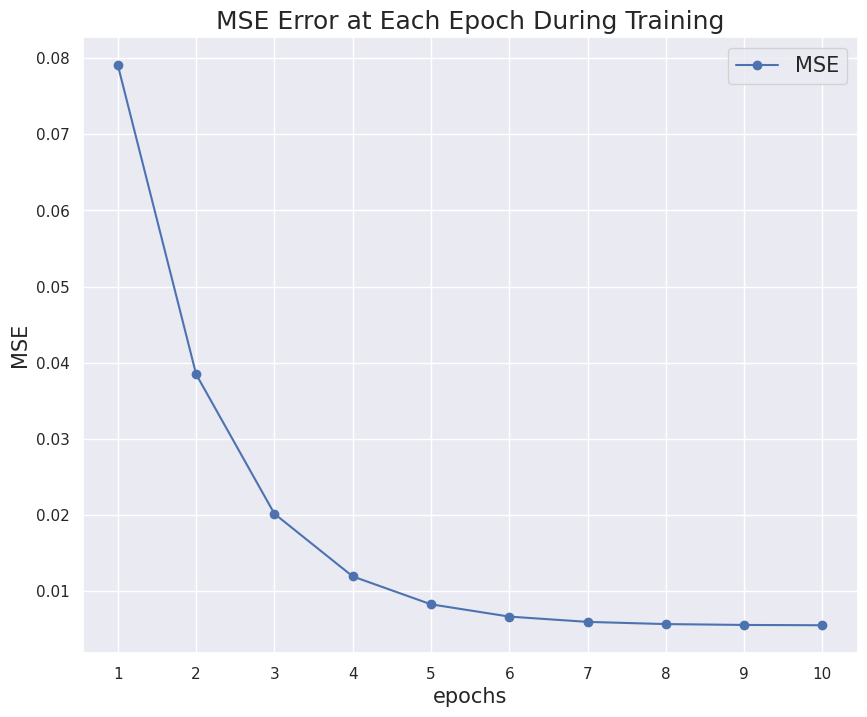

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1),
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

The mean squared error is consistently decreasing with each epoch! Next, let's observe what happens when we train a single neuron for 10 times more epochs than before, while keeping the learning rate unchanged.

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

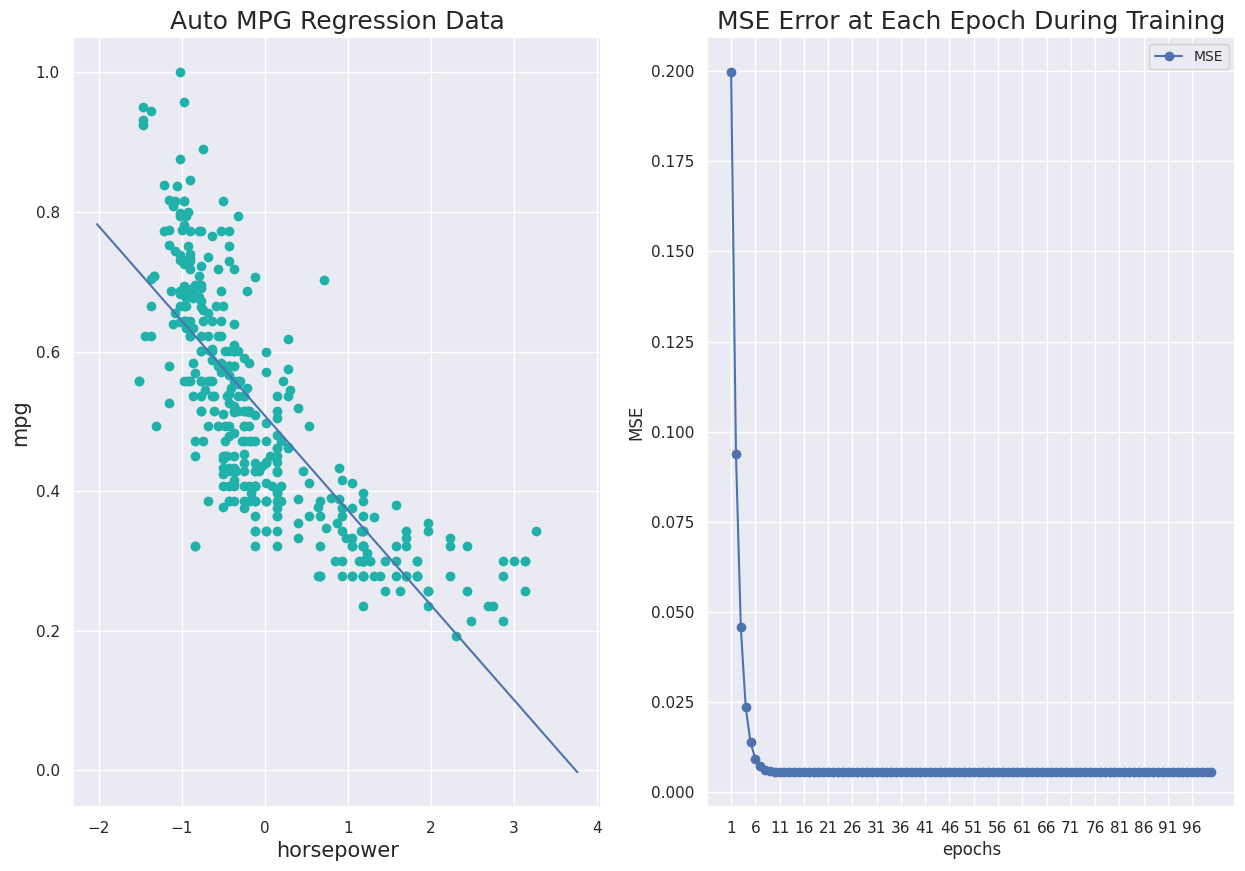

In [ ]:
node = SingleNeuron(linear_activation, alpha=0.001, epochs=100)
node.train(X_scaled, y_normal)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X_scaled, y_normal, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("horsepower", fontsize = 15)
ax1.set_ylabel("mpg", fontsize = 15)
ax1.set_title("Auto MPG Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1),
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

The choice of learning rate is a critical hyperparameter when implementing gradient descent (or stochastic gradient descent). By keeping the number of epochs fixed, we can explore the effects of different learning rate values on the model's performance.

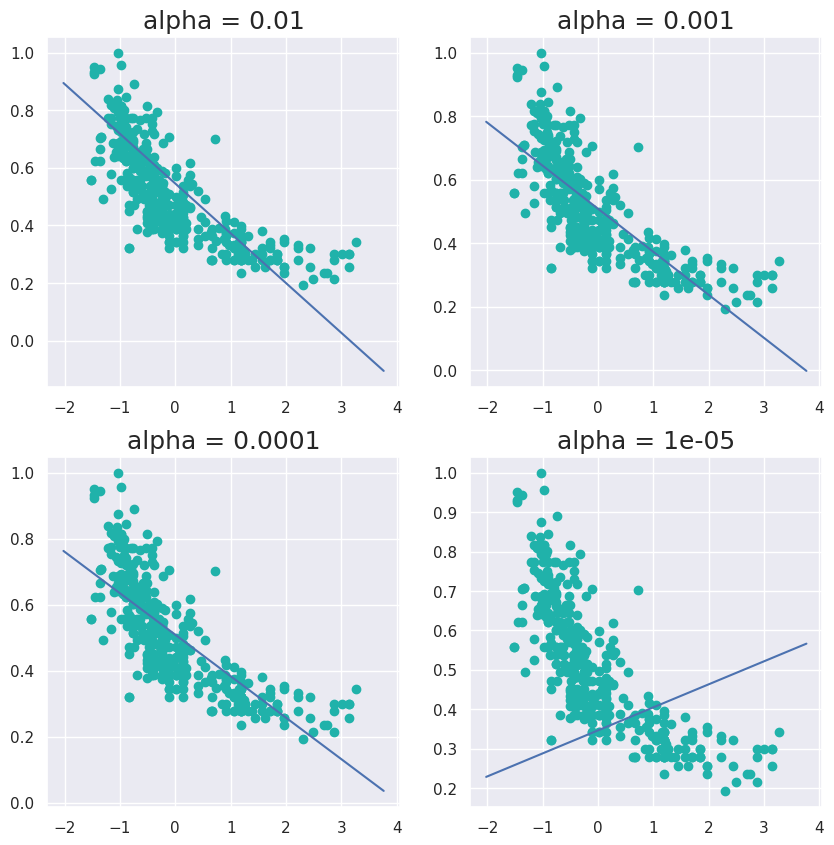

In [ ]:
alphas = [0.01, 0.001, 0.0001, 0.00001]

domain = np.linspace(np.min(X_scaled) - .5, np.max(X_scaled) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation, alpha=alpha, epochs=100)
    node.train(X_scaled, y_normal)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X_scaled, y_normal, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)